**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector as selector
import joblib


**Load Dataset**

In [2]:
data = pd.read_csv('Salary Prediction of Data Professions.csv')

data = data.rename(columns={'CURRENT DATE': 'CURRENT_DATE',
                          'LEAVES USED': 'LEAVES_USED',
                         'LEAVES REMAINING': 'LEAVES_REMAINING',
                         'PAST EXP': 'PAST_EXP'})

# 1. Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,AGE,SALARY,LEAVES_USED,LEAVES_REMAINING,RATINGS,PAST_EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT_DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES_USED       2636 non-null   float64
 10  LEAVES_REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST_EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

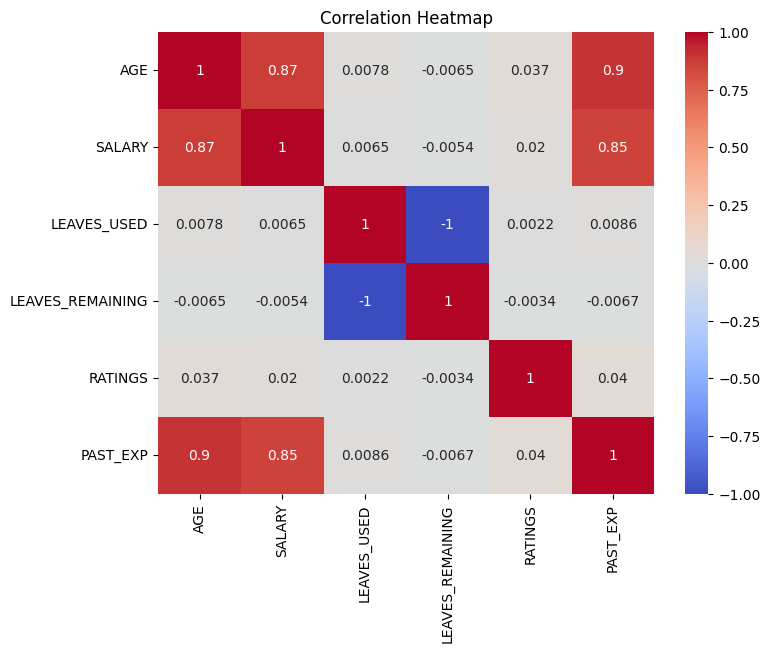

In [5]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show


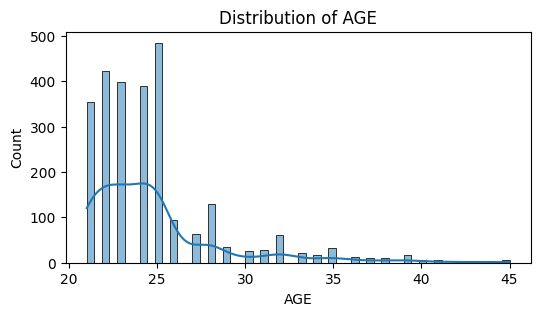

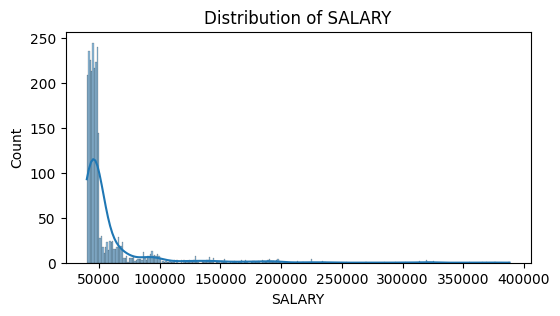

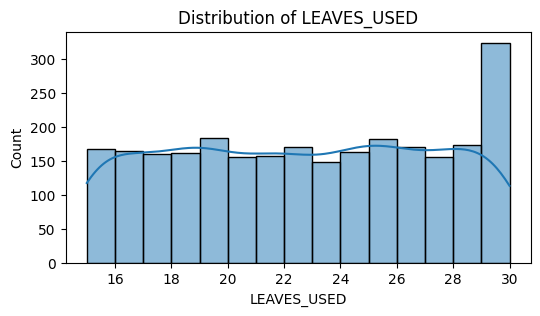

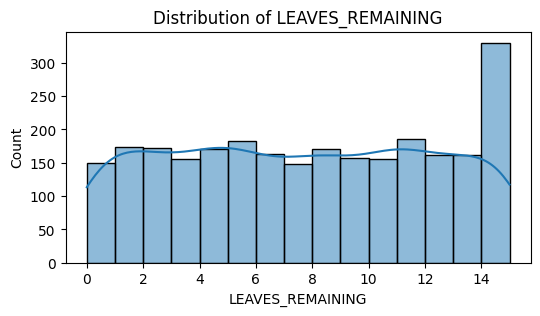

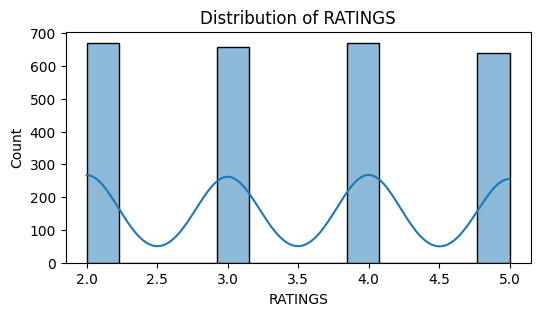

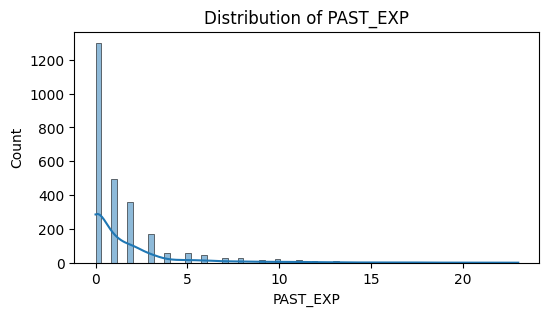

In [6]:
cols = ['AGE','SALARY','LEAVES_USED','LEAVES_REMAINING','RATINGS', 'PAST_EXP']
for col in cols:
  plt.figure(figsize=(6,3))
  sns.histplot(data[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

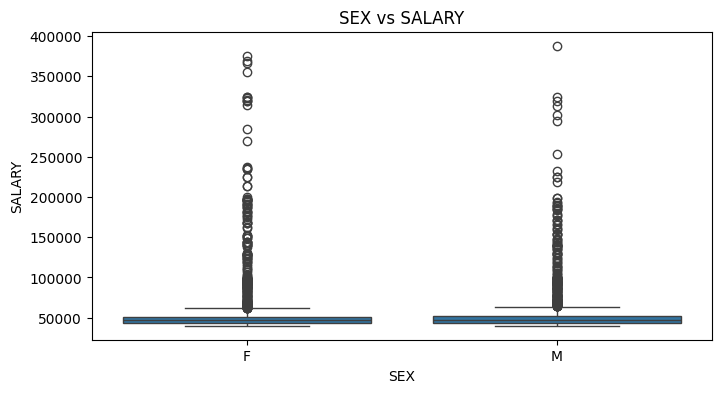

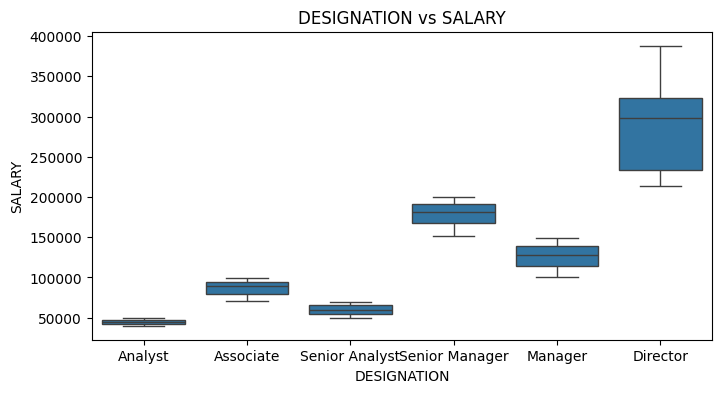

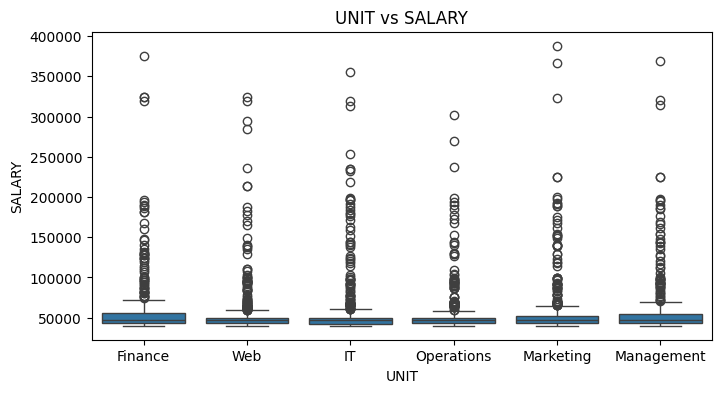

In [7]:
categorial_columns = ['SEX','DESIGNATION','UNIT']
for col in categorial_columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=col,y='SALARY', data=data)
  plt.title(f'{col} vs SALARY')
  plt.show()

# 2. Feature Engineering

In [8]:
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['CURRENT_DATE'] = pd.to_datetime(data['CURRENT_DATE'])
data['TENURE'] = (data['CURRENT_DATE'] - data['DOJ']).dt.days // 365
data['LEAVE_RATIO'] = data['LEAVES_USED'] / (data['LEAVES_USED'] + data['LEAVES_REMAINING'])
data['TOTAL_EXP'] = data['PAST_EXP'] + data['TENURE']
data.drop(columns = ['DOJ', 'CURRENT_DATE'], inplace=True)

In [9]:
data

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES_USED,LEAVES_REMAINING,RATINGS,PAST_EXP,TENURE,LEAVE_RATIO,TOTAL_EXP
0,TOMASA,ARMEN,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.0,0.800000,1.0
1,ANNIE,NaN,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN,NaN
2,OLIVE,ANCY,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.0,0.766667,1.0
3,CHERRY,AQUILAR,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.0,0.733333,2.0
4,LEON,ABOULAHOUD,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.0,0.900000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4.0,0.500000,14.0
2635,LOUISE,ALTARAS,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.0,0.566667,1.0
2636,RENEE,ALVINO,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.0,0.966667,1.0
2637,TERI,ANASTASIO,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1.0,0.766667,2.0


# 3. Data Preprocessing

In [10]:

X = data.drop(columns=['SALARY','FIRST NAME', 'LAST NAME'])
y = data['SALARY']

numeric_features = selector(dtype_include=np.number)
categorical_features = selector(dtype_include=object)

numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                      ('scaler',StandardScaler())
                                      ])
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                         ('onehet', OneHotEncoder(handle_unknown='ignore'))
                                         ])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])


# 4. Machine Learning Model Development

In [12]:

def train_models(X_train, y_train):
  models = {
      'Linear Regression': LinearRegression(),
      'Decision Tree': DecisionTreeRegressor(),
      'Random Forest' : RandomForestRegressor(),
      'Gradient Boosting': GradientBoostingRegressor()
  }
  fitted_models = {}
  for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
    pipeline.fit(X_train, y_train)
    fitted_models[name] = pipeline

  return fitted_models

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [14]:
fitted_models = train_models(X_train, y_train)

In [15]:
# Save models
joblib.dump(fitted_models, 'fitted_models.joblib')

['fitted_models.joblib']

# 5. Model Evaluation

In [16]:
def evaluate_models(models, X_test, y_test):
  for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Evaluation:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}\n')

In [17]:
evaluate_models(fitted_models, X_test, y_test)

Linear Regression Evaluation:
MAE: 4641.1314358303525
MSE: 96273657.91797104
RMSE: 9811.914080237915
R2 Score: 0.9420225739276726

Decision Tree Evaluation:
MAE: 5106.738005050505
MSE: 90601533.47706228
RMSE: 9518.483780364511
R2 Score: 0.9454384114740764

Random Forest Evaluation:
MAE: 4547.048957717051
MSE: 107448705.44796039
RMSE: 10365.746738559668
R2 Score: 0.9352927944008914

Gradient Boosting Evaluation:
MAE: 4592.598749292018
MSE: 110675189.95473275
RMSE: 10520.227656982179
R2 Score: 0.9333497575306783



# 6. ML Pipelines and Model Deployment

**Make Predictions**

In [18]:
def predict_salary(input_data, model_name):
    df = pd.DataFrame(input_data, index=[0])
    model = fitted_models[model_name]
    prediction = model.predict(df)
    return prediction[0]

In [19]:
input_data = {
    "SEX": "M",
    "DESIGNATION": "Analyst",
    "AGE": 30,
    "UNIT": "Finance",
    "LEAVES_USED": 10,
    "LEAVES_REMAINING": 5,
    "RATINGS": 4.0,
    "PAST_EXP": 5,
    "TENURE": 3,
    "LEAVE_RATIO": 0.6667,
    "TOTAL_EXP": 8
}


In [20]:
model_name = 'Random Forest'
predicted_salary = predict_salary(input_data, model_name)
print(f"Predicted Salary using {model_name}: {predicted_salary}")

Predicted Salary using Random Forest: 93534.53


**Deployment**

In [22]:
!pip install fastapi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [23]:
from fastapi import FastAPI
from pydantic import BaseModel
from joblib import load

In [24]:
app = FastAPI()
fitted_models = load('fitted_models.joblib')

class SalaryPredictionInput(BaseModel):
    SEX: str
    DESIGNATION: str
    AGE: int
    UNIT: str
    LEAVES_USED: int
    LEAVES_REMAINING: int
    RATINGS: float
    PAST_EXP: int
    TENURE: int
    LEAVE_RATIO: float
    TOTAL_EXP: int

@app.post("/predict_salary")
async def predict_salary(input_data: SalaryPredictionInput):
    input_data_dict = input_data.dict()
    df = pd.DataFrame([input_data_dict])
    model_name = 'Random Forest'
    model = fitted_models[model_name]
    prediction = model.predict(df)[0]
    return {"predicted_salary": prediction}


In [25]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [1425] using WatchFiles
ERROR:    Error loading ASGI app. Could not import module "app".
INFO:     Stopping reloader process [1425]
